In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

In [5]:
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

In [6]:
my_cosmo_cat = pd.read_csv(f'{data_folder}/cosmos-matched-df.csv', index_col = 0)

In [7]:
my_cosmo_cat.head()

,SourceID,id_1,ssfr_best_1,ssfr_med_max68_1,ssfr_med_min68_1,ssfr_med_1,sfr_best_1,sfr_med_max68_1,sfr_med_min68_1,sfr_med_1,...,flag_shallow_2,l_r_2,l_k_2,l_nu_2,dist_2,RA,Dec,int_prediction,references,status
0,4000705532455,590539.0,-8.847,-8.463,-8.865,-8.712,0.508,0.835,0.477,0.655,...,1.0,27.260,27.124,27.074,9.361438,150.679664,2.196615,0.970096,['2007ApJS..172...99C'],Referenced
1,4000705532984,610283.0,-10.040,-9.922,-10.065,-9.990,0.536,0.486,0.335,0.411,...,1.0,27.868,27.811,27.848,7.778731,150.673546,2.226438,0.961160,['2007ApJS..172...99C'],Referenced
2,4000705533312,621053.0,-10.258,-10.232,-10.368,-10.300,-0.058,-0.032,-0.168,-0.100,...,1.0,29.620,29.874,28.661,2.627196,150.667975,2.242945,0.995066,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced
3,4000705533383,617834.0,-9.445,-9.322,-9.470,-9.398,0.132,0.179,0.034,0.107,...,1.0,29.232,29.068,29.135,2.241379,150.645125,2.237650,0.985773,"['2007ApJS..172...99C', '2007ApJS..172...99C',...",Referenced
4,4000705539529,882817.0,-8.783,-8.753,-9.122,-8.868,1.319,1.346,1.025,1.232,...,0.0,28.572,28.466,28.323,3.301196,149.686626,2.637161,0.992917,"['2009ApJS..184..218L', '2007ApJS..172...99C']",Referenced


In [8]:
stu_cosmo_cat = pd.read_csv(f'{data_folder}/cat-matched-to-cosmos.csv', index_col = 0)[['SourceID', 'category']]

In [9]:
df_merge = my_cosmo_cat.merge(stu_cosmo_cat, on = 'SourceID', how = 'left')

In [10]:
df_merge.columns

Index(['SourceID', 'id_1', 'ssfr_best_1', 'ssfr_med_max68_1',
       'ssfr_med_min68_1', 'ssfr_med_1', 'sfr_best_1', 'sfr_med_max68_1',
       'sfr_med_min68_1', 'sfr_med_1', 'mass_best_1', 'mass_med_max68_1',
       'mass_med_min68_1', 'mass_med_1', 'age_1', 'type_1', 'photoz_1',
       'flag_deep_1', 'flag_shallow_1', 'l_r_1', 'l_k_1', 'l_nu_1', 'dist_1',
       'id_2', 'ssfr_best_2', 'ssfr_med_max68_2', 'ssfr_med_min68_2',
       'ssfr_med_2', 'sfr_best_2', 'sfr_med_max68_2', 'sfr_med_min68_2',
       'sfr_med_2', 'mass_best_2', 'mass_med_max68_2', 'mass_med_min68_2',
       'mass_med_2', 'age_2', 'type_2', 'photoz_2', 'flag_deep_2',
       'flag_shallow_2', 'l_r_2', 'l_k_2', 'l_nu_2', 'dist_2', 'RA', 'Dec',
       'int_prediction', 'references', 'status', 'category'],
      dtype='object')

### Looking at Redshift

In [11]:
len(df_merge.query('id_1 == id_2'))

0

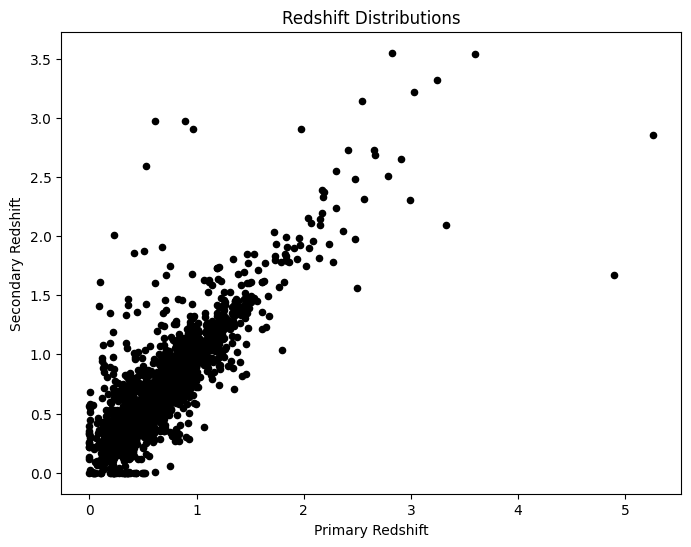

In [12]:
fig, ax1 = plt.subplots(nrows = 1)
df_merge.plot.scatter(
    x = 'photoz_1',
    y = 'photoz_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

In [13]:
cos_red = df_merge[['SourceID', 'photoz_1', 'photoz_2']]

In [14]:
zs = cos_red.assign(redshift_sub = cos_red.apply(lambda row: row.photoz_1 - row.photoz_2, axis = 1))

In [15]:
real_mergers = zs.query('redshift_sub < 0.2 and redshift_sub > -0.2 ')[['SourceID', 'redshift_sub']]

In [16]:
len(real_mergers)

2462

In [17]:
df_merg = real_mergers.merge(df_merge, on = 'SourceID', how = 'left')

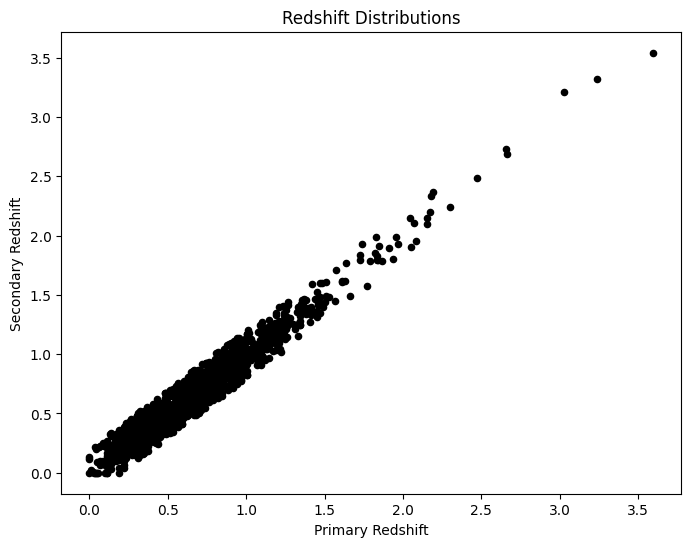

In [18]:
fig, ax1 = plt.subplots(nrows = 1)
df_merg.plot.scatter(
    x = 'photoz_1',
    y = 'photoz_2',
    ax = ax1,
    figsize = (8,6),
    grid = False,
    color = 'black',
)
ax1.set_title('Redshift Distributions')
ax1.set_xlabel('Primary Redshift')
ax1.set_ylabel('Secondary Redshift')
plt.show()

### Against Specific Star Formation Rate

In [19]:
df_merg.columns

Index(['SourceID', 'redshift_sub', 'id_1', 'ssfr_best_1', 'ssfr_med_max68_1',
       'ssfr_med_min68_1', 'ssfr_med_1', 'sfr_best_1', 'sfr_med_max68_1',
       'sfr_med_min68_1', 'sfr_med_1', 'mass_best_1', 'mass_med_max68_1',
       'mass_med_min68_1', 'mass_med_1', 'age_1', 'type_1', 'photoz_1',
       'flag_deep_1', 'flag_shallow_1', 'l_r_1', 'l_k_1', 'l_nu_1', 'dist_1',
       'id_2', 'ssfr_best_2', 'ssfr_med_max68_2', 'ssfr_med_min68_2',
       'ssfr_med_2', 'sfr_best_2', 'sfr_med_max68_2', 'sfr_med_min68_2',
       'sfr_med_2', 'mass_best_2', 'mass_med_max68_2', 'mass_med_min68_2',
       'mass_med_2', 'age_2', 'type_2', 'photoz_2', 'flag_deep_2',
       'flag_shallow_2', 'l_r_2', 'l_k_2', 'l_nu_2', 'dist_2', 'RA', 'Dec',
       'int_prediction', 'references', 'status', 'category'],
      dtype='object')

<AxesSubplot:xlabel='Primary Mass', ylabel='Primary sSFR'>

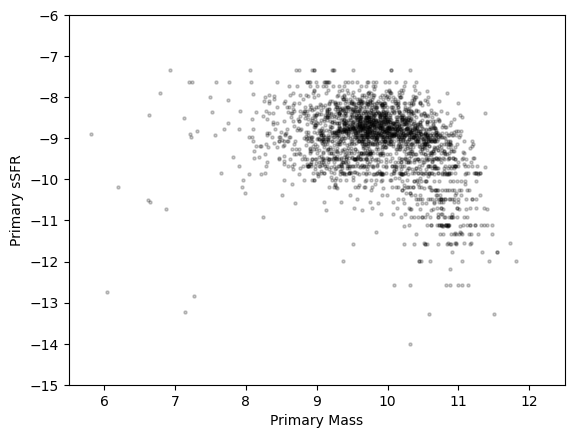

In [20]:
df_merg.plot.scatter(
    x = 'mass_best_1',
    y = 'ssfr_best_1',
    s = 5,
    color = 'black',
    alpha = 0.2,
    xlabel = 'Primary Mass',
    ylabel = 'Primary sSFR',
    xlim = [5.5, 12.5],
    ylim = [-15, -6]
)

### Controlling for Redshift

In [21]:
def binning_redshift(z, redshift_bins):
    if z <= redshift_bins[0]:
        return 0
    elif z > redshift_bins[0] and z <= redshift_bins[1]:
        return 1
    elif z > redshift_bins[1] and z <= redshift_bins[2]:
        return 2
    elif z > redshift_bins[2] and z <= redshift_bins[3]:
        return 3
    else:
        return 4

In [22]:
redshift_bins = [0.1, 0.3, 0.5, 1.0]

In [23]:
df_z = (
    df_merg
    .assign(z_bin = df_merg.photoz_1.apply(lambda x: binning_redshift(x, redshift_bins)))
)

In [56]:
def create_plot(df, ax, stage):    
    colours = ['brown', 'green', 'red', 'blue']
    for p, colour in enumerate(colours):
        df_stage = df.query(f'category == "stage{p+1}"')
        df_stage.plot.scatter(
            x = 'mass_best_1',
            y = 'ssfr_best_1',
            ax = ax,
            xlim = [5.5, 12.5],
            ylim = [-15, -6],
            xlabel = '',
            ylabel = '',
            color = colours[p],
            label = f'Stage {p+1}',
            alpha = 0.25,
            s = 5
        )
    plt.legend()

In [57]:
df_z.category.value_counts()

stage4    770
stage2    678
stage1    507
stage3    486
Name: category, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


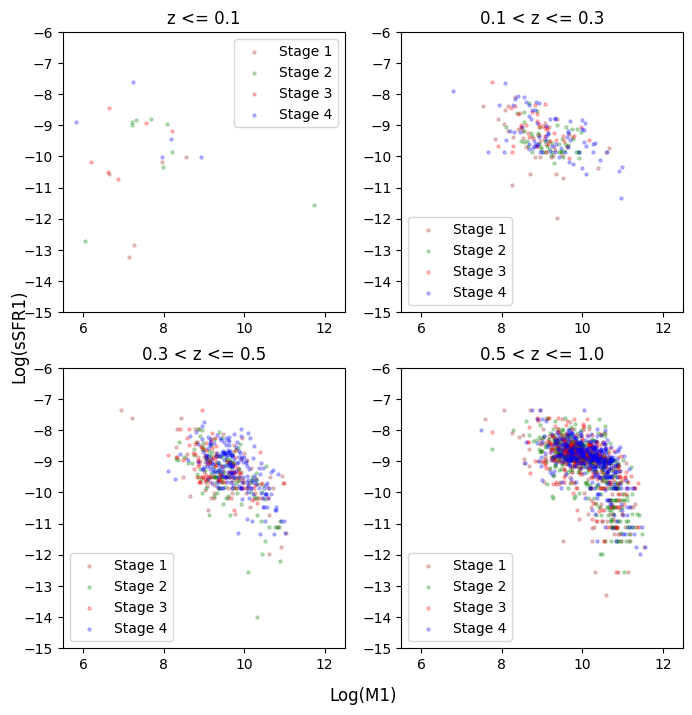

In [59]:
counter = 0
redshift_bin_list = ['z <= 0.1','0.1 < z <= 0.3','0.3 < z <= 0.5','0.5 < z <= 1.0']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot(df_z.query(f'z_bin == {counter}'), axes[i,j], counter)
        axes[i,j].set_title(redshift_bin_list[counter])
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)

plt.show()

### Controlling for Redshift AND Stage

In [70]:
def create_plot_z(df, ax, bin_z):    
    df_stage = df.query(f'z_bin == @bin_z')
    df_stage.plot.scatter(
        x = 'mass_best_1',
        y = 'ssfr_best_1',
        ax = ax,
        xlim = [5.5, 12.5],
        ylim = [-15, -6],
        xlabel = '',
        ylabel = '',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

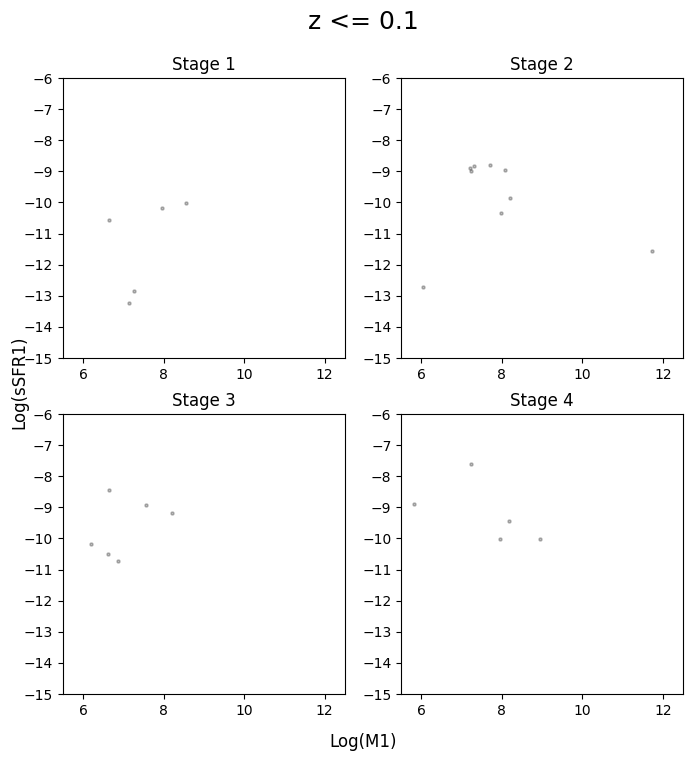

In [71]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 0)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, 'z <= 0.1', ha = 'center', va = 'center', fontsize = 18)

plt.show()

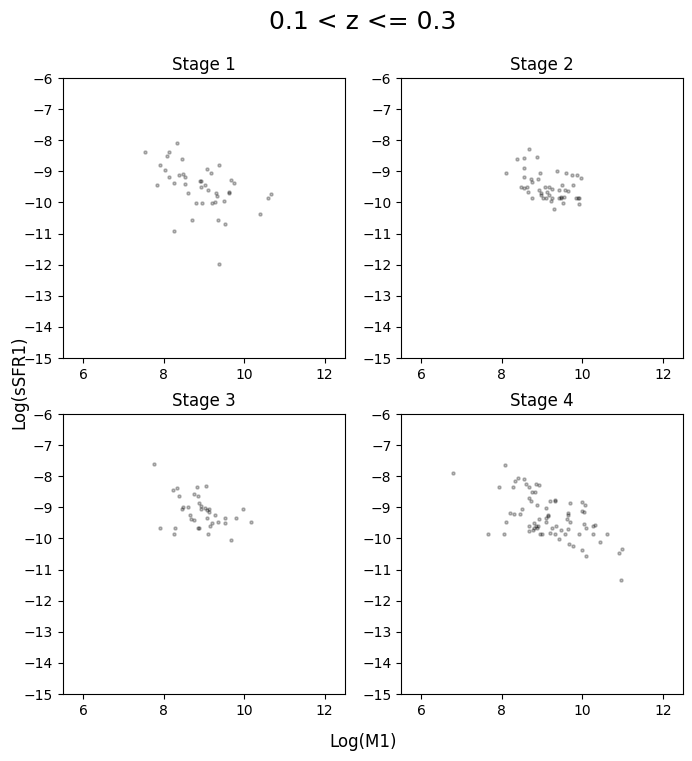

In [72]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 1)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.1 < z <= 0.3', ha = 'center', va = 'center', fontsize = 18)

plt.show()

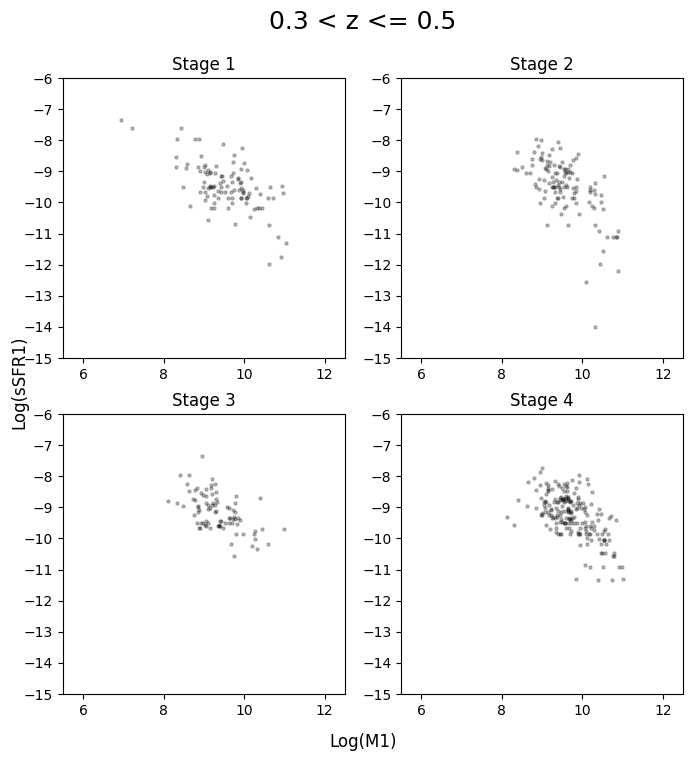

In [73]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 2)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.3 < z <= 0.5', ha = 'center', va = 'center', fontsize = 18)

plt.show()

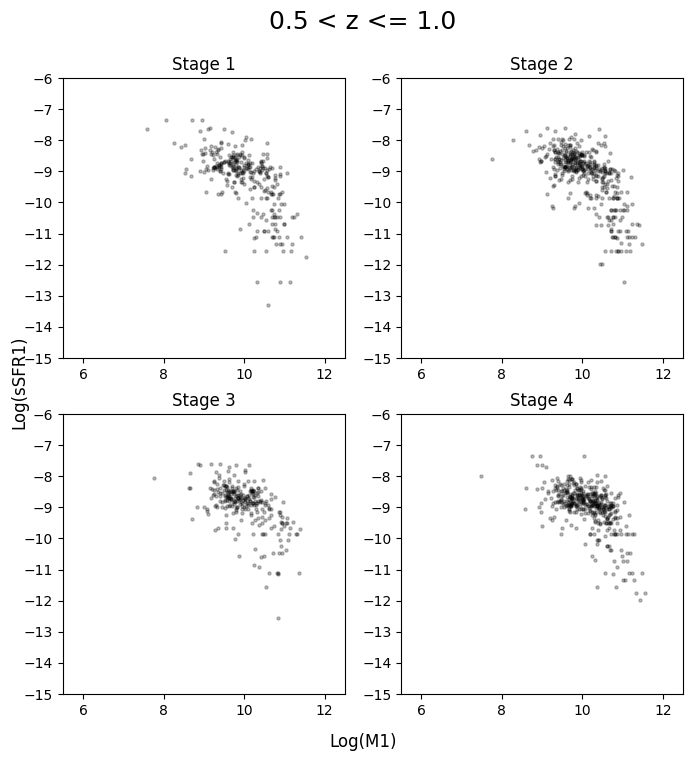

In [74]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 3)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.5 < z <= 1.0', ha = 'center', va = 'center', fontsize = 18)

plt.show()

### As Above, but Including Secondaries

In [75]:
def create_plot_z_sec(df, ax, bin_z):    
    df_stage = df.query(f'z_bin == @bin_z')
    df_stage.plot.scatter(
        x = 'mass_best_1',
        y = 'ssfr_best_1',
        ax = ax,
        xlim = [5.5, 12.5],
        ylim = [-15, -6],
        xlabel = '',
        ylabel = '',
        color = 'black',
        alpha = 0.25,
        s = 5
    )
    
    df_stage.plot.scatter(
        x = 'mass_best_2',
        y = 'ssfr_best_2',
        ax = ax,
        xlim = [5.5, 12.5],
        ylim = [-15, -6],
        xlabel = '',
        ylabel = '',
        color = 'blue',
        alpha = 0.25,
        s = 5
    )

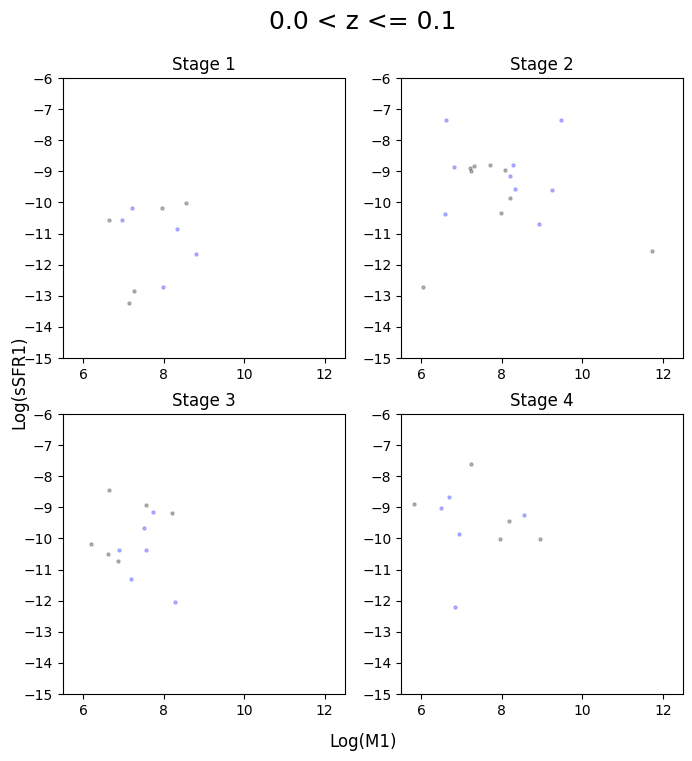

In [81]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sec(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 0)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.0 < z <= 0.1', ha = 'center', va = 'center', fontsize = 18)

plt.show()

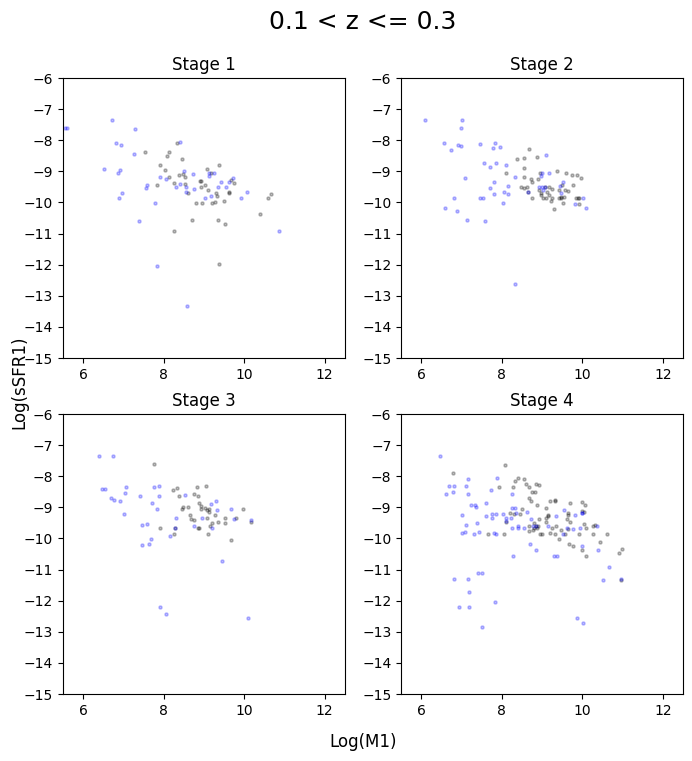

In [82]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sec(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 1)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.1 < z <= 0.3', ha = 'center', va = 'center', fontsize = 18)

plt.show()

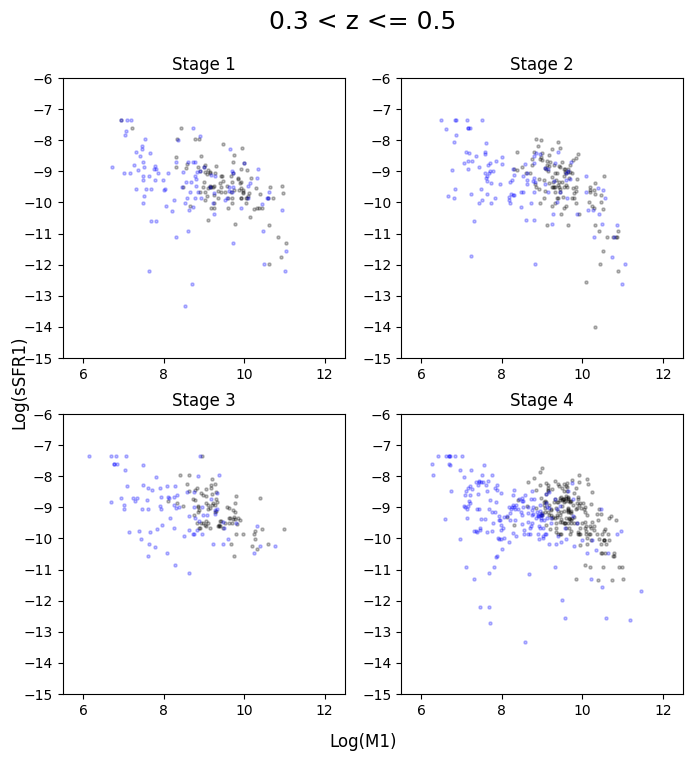

In [83]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sec(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 2)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.3 < z <= 0.5', ha = 'center', va = 'center', fontsize = 18)

plt.show()

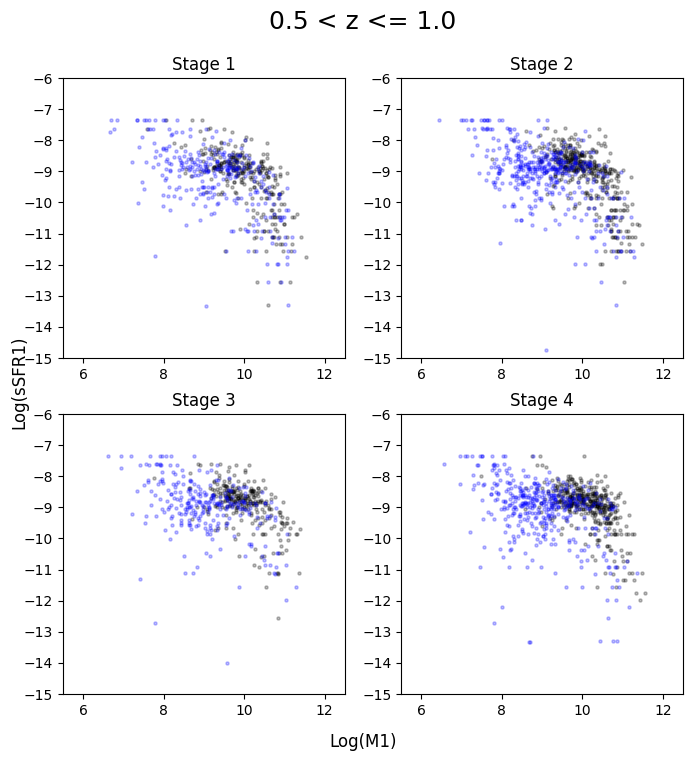

In [80]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sec(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 3)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(M1)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(sSFR1)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.5 < z <= 1.0', ha = 'center', va = 'center', fontsize = 18)

plt.show()

### Totals

In [88]:
df_z.columns

Index(['SourceID', 'redshift_sub', 'id_1', 'ssfr_best_1', 'ssfr_med_max68_1',
       'ssfr_med_min68_1', 'ssfr_med_1', 'sfr_best_1', 'sfr_med_max68_1',
       'sfr_med_min68_1', 'sfr_med_1', 'mass_best_1', 'mass_med_max68_1',
       'mass_med_min68_1', 'mass_med_1', 'age_1', 'type_1', 'photoz_1',
       'flag_deep_1', 'flag_shallow_1', 'l_r_1', 'l_k_1', 'l_nu_1', 'dist_1',
       'id_2', 'ssfr_best_2', 'ssfr_med_max68_2', 'ssfr_med_min68_2',
       'ssfr_med_2', 'sfr_best_2', 'sfr_med_max68_2', 'sfr_med_min68_2',
       'sfr_med_2', 'mass_best_2', 'mass_med_max68_2', 'mass_med_min68_2',
       'mass_med_2', 'age_2', 'type_2', 'photoz_2', 'flag_deep_2',
       'flag_shallow_2', 'l_r_2', 'l_k_2', 'l_nu_2', 'dist_2', 'RA', 'Dec',
       'int_prediction', 'references', 'status', 'category', 'z_bin'],
      dtype='object')

In [89]:
def add_log(logx1, logx2):
    x1 = 10**logx1
    x2 = 10**logx2
    return np.log10(x1 + x2)

In [97]:
def create_plot_z_sum(df, ax, bin_z):    
    df_stage = df.query(f'z_bin == @bin_z')
    df_tmp = (
        df_stage
        .assign(mass_sum = df_stage.apply(lambda row: add_log(row.mass_best_1, row.mass_best_2), axis = 1))
    )
    df_sfr = (
        df_tmp
        .assign(sfr_sum = df_tmp.apply(lambda row: add_log(row.ssfr_best_1, row.ssfr_best_2), axis = 1))
    )
    
    df_sfr.plot.scatter(
        x = 'mass_sum',
        y = 'sfr_sum',
        ax = ax,
        xlim = [5.5, 12.5],
        ylim = [-15, -6],
        xlabel = '',
        ylabel = '',
        color = 'black',
        alpha = 0.25,
        s = 5
    )

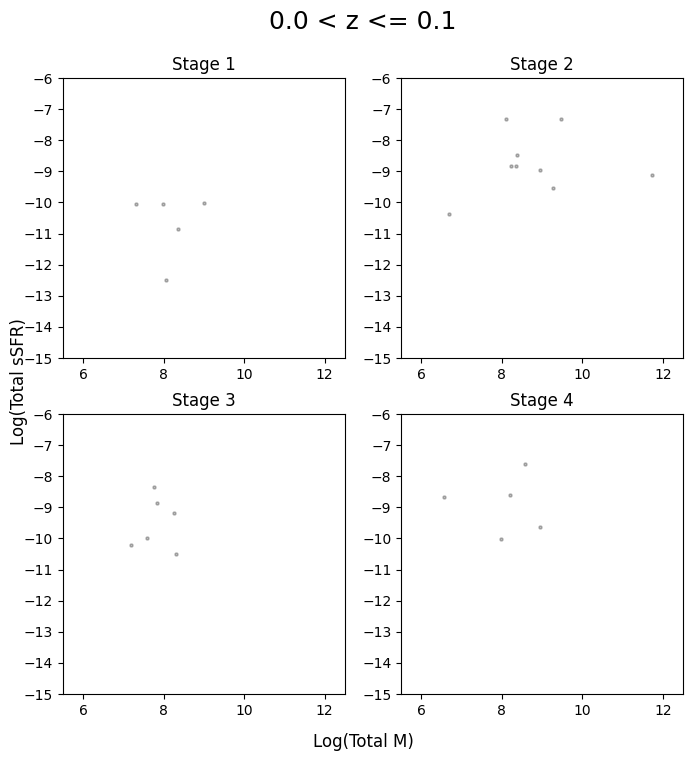

In [99]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sum(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 0)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Total M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(Total sSFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.0 < z <= 0.1', ha = 'center', va = 'center', fontsize = 18)

plt.show()

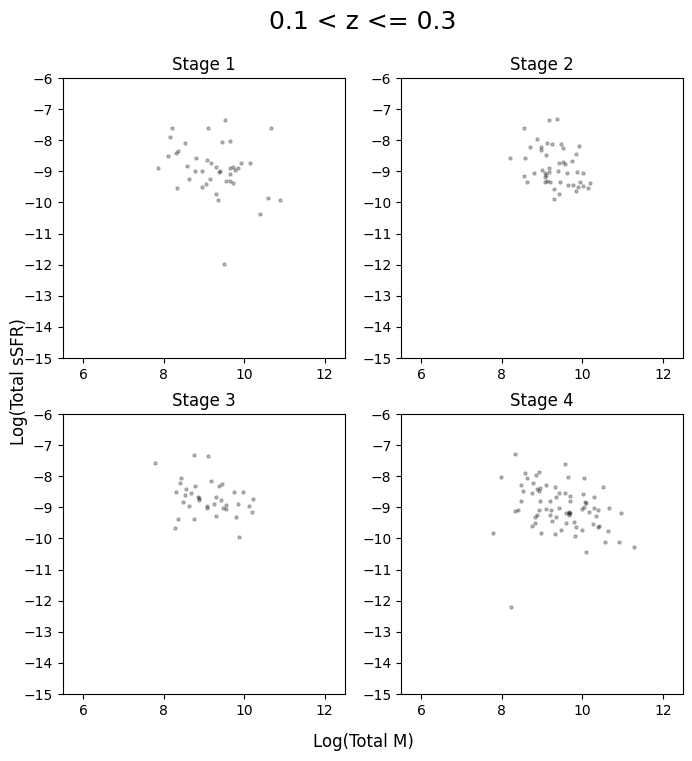

In [100]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sum(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 1)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Total M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(Total sSFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.1 < z <= 0.3', ha = 'center', va = 'center', fontsize = 18)

plt.show()

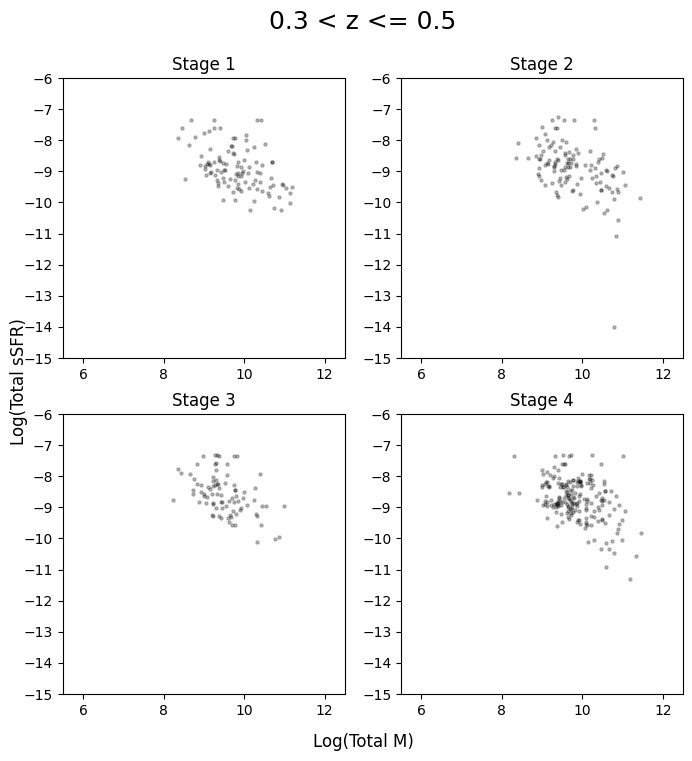

In [101]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sum(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 2)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Total M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(Total sSFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.3 < z <= 0.5', ha = 'center', va = 'center', fontsize = 18)

plt.show()

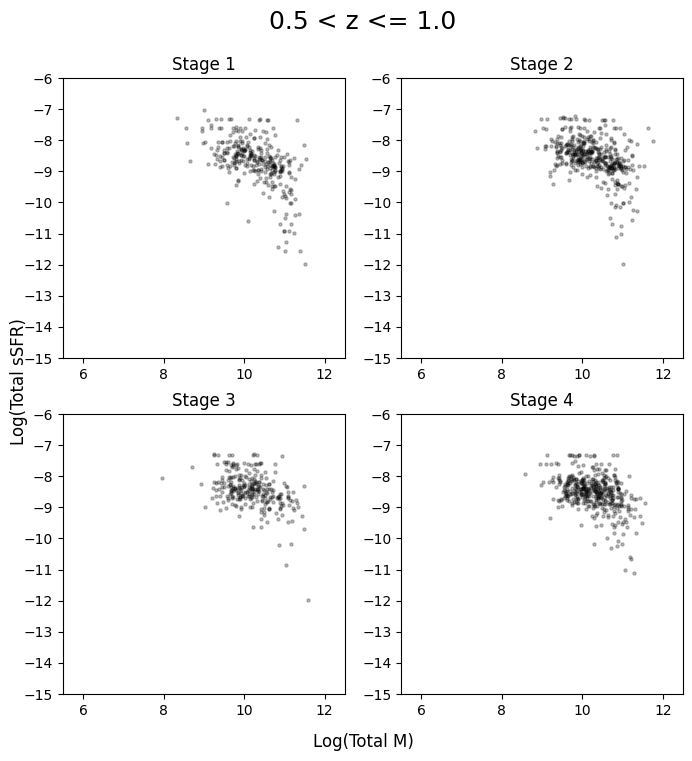

In [102]:
counter = 0
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        create_plot_z_sum(df_z.query(f'category == "stage{counter+1}"'), axes[i,j], 3)
        axes[i,j].set_title(f'Stage {counter+1}')
        counter += 1
        
fig.text(0.5, 0.05, 'Log(Total M)', ha='center', va='center', fontsize = 12)
fig.text(0.07, 0.5, 'Log(Total sSFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
fig.text(0.5, 0.95, '0.5 < z <= 1.0', ha = 'center', va = 'center', fontsize = 18)

plt.show()